In [1]:
import time
import pandas as pd
import numpy as np
from pandas import Series
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import joblib
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

 # Start

In [2]:
# read SCS data
df = pd.read_csv('SCS_data.csv')
Xs = df.iloc[:,1:20]
ys = df.iloc[:,[0]]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=5)
Xn_train = Xs_train.iloc[:,0:9]
Xn_test = Xs_test.iloc[:,0:9]
Xo_train = Xs_train.iloc[:,9:]
Xo_test = Xs_test.iloc[:,9:]

In [3]:
# read EFS data
df2 = pd.read_csv('EFS_data.csv')
Xe = df2.iloc[:,1:10]
ye = df2.iloc[:,[0]]
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.2, random_state=5)

In [4]:
# read Entire data
df3 = pd.read_csv('All_data.csv')
Xoe = df3.iloc[:,1:11]
yoe = df3.iloc[:,[0]]
Xoe_train, Xoe_test, yoe_train, yoe_test = train_test_split(Xoe, yoe, test_size=0.2, random_state=5)

# M1 XGB

In [5]:
def objective(trial: Trial,X,y) -> float:    
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 0.001,0.5),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 1,20),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)    
    model.fit(X,y,verbose=False)
    return np.mean(-cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1))

In [6]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(lambda trial: objective(trial,Xo_train,ys_train),n_trials= 100)

[I 2024-04-08 12:07:10,155] A new study created in memory with name: no-name-1e67150a-83fc-483e-82f3-786b4fe922c9
[I 2024-04-08 12:07:30,341] Trial 0 finished with value: 29893.127048728766 and parameters: {'lambda': 3.8044179845389583, 'alpha': 8.872932774843433, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.4773441405160786, 'n_estimators': 895, 'max_depth': 13, 'min_child_weight': 201}. Best is trial 0 with value: 29893.127048728766.
[I 2024-04-08 12:08:27,576] Trial 1 finished with value: 29893.127048728766 and parameters: {'lambda': 5.8280136173984065, 'alpha': 6.067274262950857, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.23697792827989164, 'n_estimators': 850, 'max_depth': 20, 'min_child_weight': 290}. Best is trial 0 with value: 29893.127048728766.
[I 2024-04-08 12:08:32,540] Trial 2 finished with value: 9994.977337639746 and parameters: {'lambda': 4.761769414660269, 'alpha': 6.8610832855752095, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learn

[I 2024-04-08 12:11:28,247] Trial 23 finished with value: 9977.031092906507 and parameters: {'lambda': 9.908956167027828, 'alpha': 7.053496547402437, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.08803059787333498, 'n_estimators': 203, 'max_depth': 19, 'min_child_weight': 31}. Best is trial 12 with value: 422.20895189742913.
[I 2024-04-08 12:11:30,264] Trial 24 finished with value: 9941.08370157923 and parameters: {'lambda': 8.43216160665114, 'alpha': 3.205183722889366, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.17863933165589385, 'n_estimators': 152, 'max_depth': 16, 'min_child_weight': 25}. Best is trial 12 with value: 422.20895189742913.
[I 2024-04-08 12:11:47,866] Trial 25 finished with value: 431.87630237719367 and parameters: {'lambda': 4.378745461012727, 'alpha': 4.996735464027578, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.03656362755126848, 'n_estimators': 326, 'max_depth': 18, 'min_child_weight': 1}. Best is trial 12 with 

[I 2024-04-08 12:15:06,970] Trial 46 finished with value: 17782.65589864769 and parameters: {'lambda': 5.459489716787038, 'alpha': 4.1205215499921914, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.11147312374173002, 'n_estimators': 576, 'max_depth': 15, 'min_child_weight': 53}. Best is trial 44 with value: 417.4045465079856.
[I 2024-04-08 12:15:17,367] Trial 47 finished with value: 1888.3147226948397 and parameters: {'lambda': 4.428975244312398, 'alpha': 4.2473939763383886, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.07147057913359242, 'n_estimators': 280, 'max_depth': 19, 'min_child_weight': 15}. Best is trial 44 with value: 417.4045465079856.
[I 2024-04-08 12:15:19,118] Trial 48 finished with value: 8769.417197176796 and parameters: {'lambda': 7.004165956375705, 'alpha': 3.6363654415072304, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.409805406153331, 'n_estimators': 106, 'max_depth': 17, 'min_child_weight': 33}. Best is trial 44 wit

[I 2024-04-08 12:19:00,734] Trial 70 finished with value: 12296.017570855412 and parameters: {'lambda': 6.528042505748838, 'alpha': 7.384450154962746, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.09063559047443824, 'n_estimators': 291, 'max_depth': 20, 'min_child_weight': 44}. Best is trial 44 with value: 417.4045465079856.
[I 2024-04-08 12:19:12,944] Trial 71 finished with value: 440.41868808221955 and parameters: {'lambda': 4.965314224804769, 'alpha': 8.893959338008608, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.12099586442881333, 'n_estimators': 380, 'max_depth': 6, 'min_child_weight': 1}. Best is trial 44 with value: 417.4045465079856.
[I 2024-04-08 12:19:18,186] Trial 72 finished with value: 636.7796723959248 and parameters: {'lambda': 4.406801517856343, 'alpha': 9.86149167892495, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.11429791632817886, 'n_estimators': 323, 'max_depth': 3, 'min_child_weight': 7}. Best is trial 44 with val

[I 2024-04-08 12:21:55,723] Trial 94 finished with value: 1688.0976078740282 and parameters: {'lambda': 4.527307535372344, 'alpha': 7.5937670065680445, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.1584846700544919, 'n_estimators': 596, 'max_depth': 2, 'min_child_weight': 16}. Best is trial 74 with value: 414.98357210973546.
[I 2024-04-08 12:22:07,134] Trial 95 finished with value: 612.1901462956978 and parameters: {'lambda': 5.973388879169991, 'alpha': 8.546978155772129, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.08080238979608292, 'n_estimators': 507, 'max_depth': 17, 'min_child_weight': 6}. Best is trial 74 with value: 414.98357210973546.
[I 2024-04-08 12:22:12,490] Trial 96 finished with value: 1614.5471254421166 and parameters: {'lambda': 5.53654087934192, 'alpha': 7.9562379812416575, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.10607443319850243, 'n_estimators': 335, 'max_depth': 10, 'min_child_weight': 15}. Best is trial 74 wit

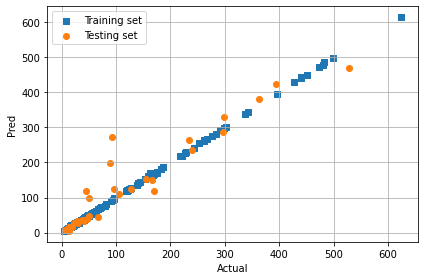

In [7]:
import matplotlib.pyplot as plt

model1 = xgb.XGBRegressor(**study1.best_trial.params)
model1.fit(Xo_train,ys_train,verbose=False)

Z1 = model1.predict(Xo_train)
Z2 = model1.predict(Xo_test)

plt.figure()
plt.scatter(ys_train, Z1, marker='s')
plt.scatter(ys_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

## M2 MLP 

In [8]:
def objective(trial: Trial,X,y) -> float:   
    #joblib.dump(study, 'study.pkl')      #保存模型
    param = {"learning_rate_init" : trial.suggest_float('learning_rate_init',0.001,0.6),
             'hidden_layer_sizes':trial.suggest_int('hidden_layer_sizes',10,1000),
             'activation':trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']),
             "solver": 'adam', 
             #'nthread' : -1
            }
    model = MLPRegressor(**param)
    model.fit(X,y)
    return np.mean(-cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)) 

In [9]:
study2 = optuna.create_study(direction='minimize',sampler=TPESampler())
ye_train1=np.array(ye_train).ravel()
study2.optimize(lambda trial: objective(trial,Xoe_train,yoe_train),n_trials= 100)

[I 2024-04-08 12:22:37,538] A new study created in memory with name: no-name-8054629b-e7bd-4494-b205-6189de367351
[I 2024-04-08 12:22:38,118] Trial 0 finished with value: 9600994.069622118 and parameters: {'learning_rate_init': 0.06999451321770664, 'hidden_layer_sizes': 39, 'activation': 'logistic'}. Best is trial 0 with value: 9600994.069622118.
[I 2024-04-08 12:22:38,243] Trial 1 finished with value: 54320276.38982753 and parameters: {'learning_rate_init': 0.09983950721353756, 'hidden_layer_sizes': 369, 'activation': 'identity'}. Best is trial 0 with value: 9600994.069622118.
[I 2024-04-08 12:22:39,249] Trial 2 finished with value: 4825208.158869692 and parameters: {'learning_rate_init': 0.36010818837539466, 'hidden_layer_sizes': 350, 'activation': 'logistic'}. Best is trial 2 with value: 4825208.158869692.
[I 2024-04-08 12:22:39,851] Trial 3 finished with value: 7180471.381194226 and parameters: {'learning_rate_init': 0.2008454903018707, 'hidden_layer_sizes': 284, 'activation': 'rel

[I 2024-04-08 12:23:32,019] Trial 33 finished with value: 1567831.4474849352 and parameters: {'learning_rate_init': 0.08356872821775349, 'hidden_layer_sizes': 738, 'activation': 'relu'}. Best is trial 13 with value: 995029.1842144274.
[I 2024-04-08 12:23:33,551] Trial 34 finished with value: 2231393.5866660066 and parameters: {'learning_rate_init': 0.11910830770737071, 'hidden_layer_sizes': 433, 'activation': 'relu'}. Best is trial 13 with value: 995029.1842144274.
[I 2024-04-08 12:23:34,094] Trial 35 finished with value: 14172378.835572641 and parameters: {'learning_rate_init': 0.05651779177656446, 'hidden_layer_sizes': 628, 'activation': 'identity'}. Best is trial 13 with value: 995029.1842144274.
[I 2024-04-08 12:23:36,229] Trial 36 finished with value: 1225355.9767205778 and parameters: {'learning_rate_init': 0.02107798066265487, 'hidden_layer_sizes': 546, 'activation': 'relu'}. Best is trial 13 with value: 995029.1842144274.
[I 2024-04-08 12:23:38,063] Trial 37 finished with value

[I 2024-04-08 12:24:27,367] Trial 66 finished with value: 4819738.653288313 and parameters: {'learning_rate_init': 0.05666390552752207, 'hidden_layer_sizes': 628, 'activation': 'tanh'}. Best is trial 51 with value: 975294.6986807646.
[I 2024-04-08 12:24:30,334] Trial 67 finished with value: 1536260.9319342768 and parameters: {'learning_rate_init': 0.042511756275340026, 'hidden_layer_sizes': 783, 'activation': 'relu'}. Best is trial 51 with value: 975294.6986807646.
[I 2024-04-08 12:24:31,743] Trial 68 finished with value: 1612244.0925582978 and parameters: {'learning_rate_init': 0.09071183317952516, 'hidden_layer_sizes': 463, 'activation': 'relu'}. Best is trial 51 with value: 975294.6986807646.
[I 2024-04-08 12:24:33,426] Trial 69 finished with value: 1539299.722440639 and parameters: {'learning_rate_init': 0.0013013822232239955, 'hidden_layer_sizes': 597, 'activation': 'identity'}. Best is trial 51 with value: 975294.6986807646.
[I 2024-04-08 12:24:34,794] Trial 70 finished with valu

[I 2024-04-08 12:25:31,897] Trial 99 finished with value: 1257826.2405622883 and parameters: {'learning_rate_init': 0.03022511269286687, 'hidden_layer_sizes': 633, 'activation': 'relu'}. Best is trial 93 with value: 915714.9854019167.


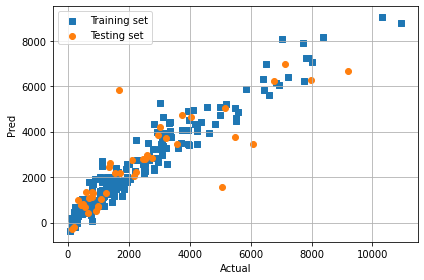

In [10]:
model2 = MLPRegressor(**study2.best_trial.params)
model2.fit(np.array(Xoe_train),yoe_train)

Z1 = model2.predict(Xoe_train)
Z2 = model2.predict(Xoe_test)

#xx = np.linspace(-1, 4, 10)
#yy = xx

plt.figure()
#plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(yoe_train, Z1, marker='s')
plt.scatter(yoe_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

## M3 MLP

In [11]:
def objective(trial: Trial,X,y) -> float:   
    #joblib.dump(study, 'study.pkl')      #保存模型
    param = {"learning_rate_init" : trial.suggest_float('learning_rate_init',0.001,0.6),
             'hidden_layer_sizes':trial.suggest_int('hidden_layer_sizes',10,1000),
             'activation':trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']),
             "solver": 'adam', 
             #'nthread' : -1
            }
    model = MLPRegressor(**param)
    model.fit(X,y)
    return np.mean(-cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)) 

In [12]:
study3 = optuna.create_study(direction='minimize',sampler=TPESampler())
ys_train1=np.array(ys_train).ravel()
study3.optimize(lambda trial: objective(trial,Xo_train,ys_train),n_trials= 100)

[I 2024-04-08 12:25:32,650] A new study created in memory with name: no-name-78a0cc74-fafd-427d-b18b-14f422280c09
[I 2024-04-08 12:25:36,245] Trial 0 finished with value: 12120.780642757256 and parameters: {'learning_rate_init': 0.470485027377837, 'hidden_layer_sizes': 633, 'activation': 'logistic'}. Best is trial 0 with value: 12120.780642757256.
[I 2024-04-08 12:25:39,417] Trial 1 finished with value: 12575.00727082757 and parameters: {'learning_rate_init': 0.4818476401270755, 'hidden_layer_sizes': 603, 'activation': 'logistic'}. Best is trial 0 with value: 12120.780642757256.
[I 2024-04-08 12:25:39,686] Trial 2 finished with value: 37255317.410334885 and parameters: {'learning_rate_init': 0.4572318637844128, 'hidden_layer_sizes': 976, 'activation': 'relu'}. Best is trial 0 with value: 12120.780642757256.
[I 2024-04-08 12:25:40,057] Trial 3 finished with value: 16608.936057863408 and parameters: {'learning_rate_init': 0.2983805690886121, 'hidden_layer_sizes': 136, 'activation': 'tanh

[I 2024-04-08 12:26:01,367] Trial 33 finished with value: 1191.0451908128907 and parameters: {'learning_rate_init': 0.053976365162988996, 'hidden_layer_sizes': 562, 'activation': 'relu'}. Best is trial 25 with value: 350.86053457591964.
[I 2024-04-08 12:26:01,555] Trial 34 finished with value: 3424.1030522711894 and parameters: {'learning_rate_init': 0.0974392568227111, 'hidden_layer_sizes': 11, 'activation': 'relu'}. Best is trial 25 with value: 350.86053457591964.
[I 2024-04-08 12:26:03,582] Trial 35 finished with value: 13670.049949430406 and parameters: {'learning_rate_init': 0.17255728864710476, 'hidden_layer_sizes': 340, 'activation': 'logistic'}. Best is trial 25 with value: 350.86053457591964.
[I 2024-04-08 12:26:04,165] Trial 36 finished with value: 2663.1020262141096 and parameters: {'learning_rate_init': 0.051464752518821655, 'hidden_layer_sizes': 267, 'activation': 'relu'}. Best is trial 25 with value: 350.86053457591964.
[I 2024-04-08 12:26:05,707] Trial 37 finished with v

[I 2024-04-08 12:26:22,889] Trial 66 finished with value: 5289.250954426194 and parameters: {'learning_rate_init': 0.020577658498890424, 'hidden_layer_sizes': 267, 'activation': 'relu'}. Best is trial 46 with value: 346.1382751610905.
[I 2024-04-08 12:26:23,370] Trial 67 finished with value: 14880.747851766355 and parameters: {'learning_rate_init': 0.09638606439995598, 'hidden_layer_sizes': 173, 'activation': 'relu'}. Best is trial 46 with value: 346.1382751610905.
[I 2024-04-08 12:26:23,473] Trial 68 finished with value: 12046787.914819116 and parameters: {'learning_rate_init': 0.14942971823075896, 'hidden_layer_sizes': 215, 'activation': 'identity'}. Best is trial 46 with value: 346.1382751610905.
[I 2024-04-08 12:26:24,718] Trial 69 finished with value: 791.4210427561923 and parameters: {'learning_rate_init': 0.048910471283212964, 'hidden_layer_sizes': 355, 'activation': 'relu'}. Best is trial 46 with value: 346.1382751610905.
[I 2024-04-08 12:26:25,775] Trial 70 finished with value

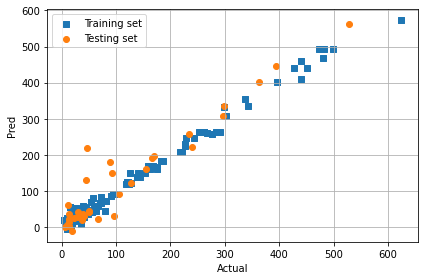

In [13]:
model3 = MLPRegressor(**study3.best_trial.params)
model3.fit(Xo_train,ys_train)

Z1 = model3.predict(Xo_train)
Z2 = model3.predict(Xo_test)

#xx = np.linspace(-1, 4, 10)
#yy = xx

plt.figure()
#plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(ys_train, Z1, marker='s')
plt.scatter(ys_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

## M4 ANN

In [14]:
X4_train = np.concatenate([Xo_train, Xoe_train])
y4_train = np.concatenate([ys_train, yoe_train])
X4_test = np.concatenate([Xo_test, Xoe_test])
y4_test = np.concatenate([ys_test, yoe_test])

In [15]:
def objective(trial: Trial,X,y) -> float:   
    #joblib.dump(study, 'study.pkl')      #保存模型
    param = {"learning_rate_init" : trial.suggest_float('learning_rate_init',0.001,0.6),
             'hidden_layer_sizes':trial.suggest_int('hidden_layer_sizes',10,1000),
             'activation':trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']),
             "solver": 'adam', 
             #'nthread' : -1
            }
    model = MLPRegressor(**param)
    model.fit(X,y)
    return np.mean(-cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)) 

In [16]:
study4 = optuna.create_study(direction='minimize',sampler=TPESampler())
y4_train1=np.array(y4_train).ravel()
study4.optimize(lambda trial: objective(trial,X4_train,y4_train),n_trials= 100)

[I 2024-04-08 12:26:47,796] A new study created in memory with name: no-name-bcdff89f-a399-4116-af17-b4d4dd0b5899
[I 2024-04-08 12:26:48,668] Trial 0 finished with value: 4263908066.2948647 and parameters: {'learning_rate_init': 0.3834731433118301, 'hidden_layer_sizes': 387, 'activation': 'identity'}. Best is trial 0 with value: 4263908066.2948647.
[I 2024-04-08 12:26:49,289] Trial 1 finished with value: 4782241.650594288 and parameters: {'learning_rate_init': 0.1689590584745556, 'hidden_layer_sizes': 20, 'activation': 'logistic'}. Best is trial 1 with value: 4782241.650594288.
[I 2024-04-08 12:26:50,293] Trial 2 finished with value: 978606.4380047269 and parameters: {'learning_rate_init': 0.001240155261498248, 'hidden_layer_sizes': 184, 'activation': 'identity'}. Best is trial 2 with value: 978606.4380047269.
[I 2024-04-08 12:26:50,612] Trial 3 finished with value: 423745936394.533 and parameters: {'learning_rate_init': 0.5362687389939272, 'hidden_layer_sizes': 803, 'activation': 'ide

[I 2024-04-08 12:27:31,934] Trial 33 finished with value: 860929.2638093339 and parameters: {'learning_rate_init': 0.07693846329112398, 'hidden_layer_sizes': 78, 'activation': 'relu'}. Best is trial 11 with value: 576271.0952373615.
[I 2024-04-08 12:27:33,258] Trial 34 finished with value: 609283.0562979521 and parameters: {'learning_rate_init': 0.006171536834554828, 'hidden_layer_sizes': 179, 'activation': 'relu'}. Best is trial 11 with value: 576271.0952373615.
[I 2024-04-08 12:27:33,842] Trial 35 finished with value: 1009130.8017929991 and parameters: {'learning_rate_init': 0.13272033687234575, 'hidden_layer_sizes': 240, 'activation': 'relu'}. Best is trial 11 with value: 576271.0952373615.
[I 2024-04-08 12:27:38,081] Trial 36 finished with value: 4316894.703010233 and parameters: {'learning_rate_init': 0.04933161449744708, 'hidden_layer_sizes': 361, 'activation': 'logistic'}. Best is trial 11 with value: 576271.0952373615.
[I 2024-04-08 12:27:38,762] Trial 37 finished with value: 7

[I 2024-04-08 12:28:16,520] Trial 67 finished with value: 703685.3581773364 and parameters: {'learning_rate_init': 0.018772172608677442, 'hidden_layer_sizes': 112, 'activation': 'relu'}. Best is trial 57 with value: 550148.1785798365.
[I 2024-04-08 12:28:17,243] Trial 68 finished with value: 878462.6328876615 and parameters: {'learning_rate_init': 0.06479360023493003, 'hidden_layer_sizes': 352, 'activation': 'relu'}. Best is trial 57 with value: 550148.1785798365.
[I 2024-04-08 12:28:17,555] Trial 69 finished with value: 5636910.389287645 and parameters: {'learning_rate_init': 0.05083043821237754, 'hidden_layer_sizes': 14, 'activation': 'tanh'}. Best is trial 57 with value: 550148.1785798365.
[I 2024-04-08 12:28:18,952] Trial 70 finished with value: 984859.8981428414 and parameters: {'learning_rate_init': 0.0015743775509377443, 'hidden_layer_sizes': 518, 'activation': 'identity'}. Best is trial 57 with value: 550148.1785798365.
[I 2024-04-08 12:28:19,947] Trial 71 finished with value: 

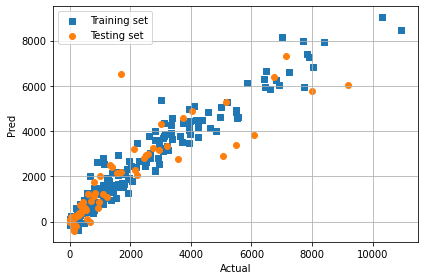

In [17]:
model4 = MLPRegressor(**study4.best_trial.params)
model4.fit(X4_train,y4_train)

Z1 = model4.predict(X4_train)
Z2 = model4.predict(X4_test)

#xx = np.linspace(-1, 4, 10)
#yy = xx

plt.figure()
#plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y4_train, Z1, marker='s')
plt.scatter(y4_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

## M5 PEKDA-ANN

In [18]:
def objective(trial: Trial,X,y) -> float:   
    #joblib.dump(study, 'study.pkl')      #保存模型
    param = {"learning_rate_init" : trial.suggest_float('learning_rate_init',0.001,0.6),
             'hidden_layer_sizes':trial.suggest_int('hidden_layer_sizes',10,1000),
             'activation':trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']),
             "solver": 'adam', 
             #'nthread' : -1
            }
    model = MLPRegressor(**param)
    model.fit(X,y)
    return np.mean(-cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)) 

In [19]:
study5 = optuna.create_study(direction='minimize',sampler=TPESampler())

study5.optimize(lambda trial: objective(trial,Xe_train,ye_train),n_trials= 200)

[I 2024-04-08 12:28:46,921] A new study created in memory with name: no-name-f3b8b82a-56d6-44e4-a04a-9142354063bd
[I 2024-04-08 12:28:48,067] Trial 0 finished with value: 24023056.17901578 and parameters: {'learning_rate_init': 0.3067296881220821, 'hidden_layer_sizes': 936, 'activation': 'relu'}. Best is trial 0 with value: 24023056.17901578.
[I 2024-04-08 12:28:48,327] Trial 1 finished with value: 36749420.54995288 and parameters: {'learning_rate_init': 0.5238790802331942, 'hidden_layer_sizes': 19, 'activation': 'tanh'}. Best is trial 0 with value: 24023056.17901578.
[I 2024-04-08 12:28:48,793] Trial 2 finished with value: 126318.79696806156 and parameters: {'learning_rate_init': 0.09823147544638053, 'hidden_layer_sizes': 122, 'activation': 'relu'}. Best is trial 2 with value: 126318.79696806156.
[I 2024-04-08 12:28:49,169] Trial 3 finished with value: 38172310.0995893 and parameters: {'learning_rate_init': 0.5882429445167023, 'hidden_layer_sizes': 20, 'activation': 'logistic'}. Best 

[I 2024-04-08 12:29:24,683] Trial 33 finished with value: 11567670.367490955 and parameters: {'learning_rate_init': 0.11004186095341803, 'hidden_layer_sizes': 721, 'activation': 'relu'}. Best is trial 24 with value: 42759.64799349812.
[I 2024-04-08 12:29:24,851] Trial 34 finished with value: 390372.19307413825 and parameters: {'learning_rate_init': 0.0027150158684454695, 'hidden_layer_sizes': 30, 'activation': 'relu'}. Best is trial 24 with value: 42759.64799349812.
[I 2024-04-08 12:29:24,981] Trial 35 finished with value: 981750.406884329 and parameters: {'learning_rate_init': 0.010606232807828943, 'hidden_layer_sizes': 24, 'activation': 'relu'}. Best is trial 24 with value: 42759.64799349812.
[I 2024-04-08 12:29:25,453] Trial 36 finished with value: 31246572.94931405 and parameters: {'learning_rate_init': 0.14139153630879625, 'hidden_layer_sizes': 91, 'activation': 'tanh'}. Best is trial 24 with value: 42759.64799349812.
[I 2024-04-08 12:29:25,803] Trial 37 finished with value: 46517

[I 2024-04-08 12:29:44,329] Trial 67 finished with value: 817610.2895027307 and parameters: {'learning_rate_init': 0.1258206435575586, 'hidden_layer_sizes': 192, 'activation': 'relu'}. Best is trial 54 with value: 2977.9770431104043.
[I 2024-04-08 12:29:44,611] Trial 68 finished with value: 54752907.384819195 and parameters: {'learning_rate_init': 0.021337856582835754, 'hidden_layer_sizes': 45, 'activation': 'tanh'}. Best is trial 54 with value: 2977.9770431104043.
[I 2024-04-08 12:29:44,829] Trial 69 finished with value: 524857.619591725 and parameters: {'learning_rate_init': 0.14724852557471457, 'hidden_layer_sizes': 105, 'activation': 'relu'}. Best is trial 54 with value: 2977.9770431104043.
[I 2024-04-08 12:29:45,216] Trial 70 finished with value: 39852881.349282905 and parameters: {'learning_rate_init': 0.267248523547567, 'hidden_layer_sizes': 466, 'activation': 'relu'}. Best is trial 54 with value: 2977.9770431104043.
[I 2024-04-08 12:29:47,001] Trial 71 finished with value: 1667

[I 2024-04-08 12:30:45,508] Trial 100 finished with value: 1644953.677143444 and parameters: {'learning_rate_init': 0.0017411359210361688, 'hidden_layer_sizes': 823, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:30:47,745] Trial 101 finished with value: 1817.516474879191 and parameters: {'learning_rate_init': 0.0399754448195575, 'hidden_layer_sizes': 774, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:30:49,487] Trial 102 finished with value: 4858.2242616514695 and parameters: {'learning_rate_init': 0.04031544803307724, 'hidden_layer_sizes': 727, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:30:52,401] Trial 103 finished with value: 524292.6614333997 and parameters: {'learning_rate_init': 0.02716981887923667, 'hidden_layer_sizes': 875, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:30:54,015] Trial 104 finished with va

[I 2024-04-08 12:31:40,376] Trial 133 finished with value: 78365.77707569336 and parameters: {'learning_rate_init': 0.04374276841227441, 'hidden_layer_sizes': 433, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:31:42,481] Trial 134 finished with value: 403022.9209768467 and parameters: {'learning_rate_init': 0.028645571741863392, 'hidden_layer_sizes': 605, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:31:44,502] Trial 135 finished with value: 903.1653377211342 and parameters: {'learning_rate_init': 0.052260653959084705, 'hidden_layer_sizes': 504, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:31:47,315] Trial 136 finished with value: 13947141.255530108 and parameters: {'learning_rate_init': 0.07551254162867949, 'hidden_layer_sizes': 502, 'activation': 'tanh'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:31:48,398] Trial 137 finished with v

[I 2024-04-08 12:32:53,729] Trial 166 finished with value: 16448552.474573076 and parameters: {'learning_rate_init': 0.057367926946714616, 'hidden_layer_sizes': 522, 'activation': 'tanh'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:32:57,844] Trial 167 finished with value: 28964575.072282486 and parameters: {'learning_rate_init': 0.044361345691006256, 'hidden_layer_sizes': 544, 'activation': 'logistic'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:32:59,865] Trial 168 finished with value: 115104.82992019106 and parameters: {'learning_rate_init': 0.028386878084026422, 'hidden_layer_sizes': 589, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:33:00,096] Trial 169 finished with value: 57366516.45138903 and parameters: {'learning_rate_init': 0.48098465647218214, 'hidden_layer_sizes': 668, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.
[I 2024-04-08 12:33:00,874] Trial 170 finished

[I 2024-04-08 12:33:48,079] Trial 199 finished with value: 94611.73704833667 and parameters: {'learning_rate_init': 0.06467227149075053, 'hidden_layer_sizes': 396, 'activation': 'relu'}. Best is trial 89 with value: 196.66304710528593.


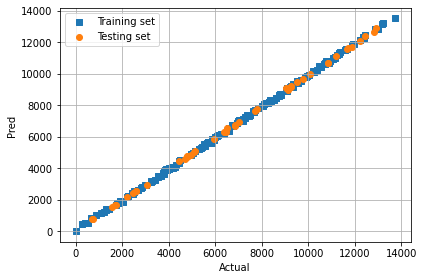

In [20]:
model5 = MLPRegressor(**study5.best_trial.params)
model5.fit(np.array(Xe_train),ye_train)

Z1 = model5.predict(np.array(Xe_train))
Z2 = model5.predict(np.array(Xe_test))

#xx = np.linspace(-1, 4, 10)
#yy = xx

plt.figure()
#plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(ye_train, Z1, marker='s')
plt.scatter(ye_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

In [21]:
# model 6

def objective(trial) -> float:
    n = trial.suggest_int("n",1,50)
    model6 = model5
    for num in range(1,n):
        model6.partial_fit(np.array(Xn_train), ys_train)
    return r2_score(ys_train, model6.predict(np.array(Xn_train)))+r2_score(ye_train, model6.predict(np.array(Xe_train)))

In [22]:
study6 = optuna.create_study(direction='maximize',sampler=TPESampler())
study6.optimize(objective, n_trials=50)  # number of iterations
study6.best_params

[I 2024-04-08 12:33:48,451] A new study created in memory with name: no-name-b31a0611-23a4-4285-9f3d-e38946913db1
[I 2024-04-08 12:33:48,574] Trial 0 finished with value: 1.8795457708489451 and parameters: {'n': 30}. Best is trial 0 with value: 1.8795457708489451.
[I 2024-04-08 12:33:48,729] Trial 1 finished with value: 1.8608344184858172 and parameters: {'n': 39}. Best is trial 0 with value: 1.8795457708489451.
[I 2024-04-08 12:33:48,890] Trial 2 finished with value: 1.830652213479925 and parameters: {'n': 42}. Best is trial 0 with value: 1.8795457708489451.
[I 2024-04-08 12:33:48,984] Trial 3 finished with value: 1.8114803610221157 and parameters: {'n': 24}. Best is trial 0 with value: 1.8795457708489451.
[I 2024-04-08 12:33:49,017] Trial 4 finished with value: 1.8056533631296316 and parameters: {'n': 8}. Best is trial 0 with value: 1.8795457708489451.
[I 2024-04-08 12:33:49,127] Trial 5 finished with value: 1.7848460797851142 and parameters: {'n': 27}. Best is trial 0 with value: 1.

{'n': 30}

In [23]:
n = study6.best_params.get("n")
model6=model5
for num in range(1,n):
    model6.partial_fit(np.array(Xn_train), ys_train)

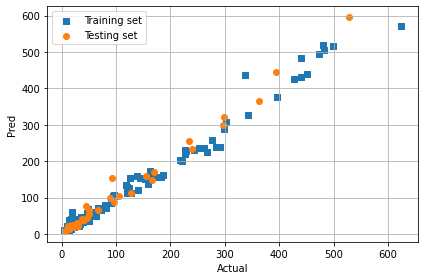

In [24]:
Z1=model6.predict(Xn_train)
Z2=model6.predict(Xn_test)
plt.figure()
#plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(ys_train, Z1, marker='s')
plt.scatter(ys_test, Z2, marker='o')

plt.grid()
plt.legend(['Training set', 'Testing set'], loc = 'upper left')
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Actual')
plt.ylabel('Pred')

plt.tight_layout()
plt.show()

## Test Int.

In [25]:
P1 = model1.predict(Xo_test)
P2 = model2.predict(np.array(Xo_test))
P3 = model3.predict(Xo_test)
P4 = model4.predict(Xo_test)
P5 = model6.predict(Xn_test)

print("M1 Int. R2:", r2_score(ys_test, P1), "RMSE:", np.sqrt(mean_squared_error(ys_test, P1)), "MAE:", mean_absolute_error(ys_test, P1))
print("M2 Int. R2:", r2_score(ys_test, P2), "RMSE:", np.sqrt(mean_squared_error(ys_test, P2)), "MAE:", mean_absolute_error(ys_test, P2))
print("M3 Int. R2:", r2_score(ys_test, P3), "RMSE:", np.sqrt(mean_squared_error(ys_test, P3)), "MAE:", mean_absolute_error(ys_test, P3))
print("M4 Int. R2:", r2_score(ys_test, P4), "RMSE:", np.sqrt(mean_squared_error(ys_test, P4)), "MAE:", mean_absolute_error(ys_test, P4))
print("M5 Int. R2:", r2_score(ys_test, P5), "RMSE:", np.sqrt(mean_squared_error(ys_test, P5)), "MAE:", mean_absolute_error(ys_test, P5))

M1 Int. R2: 0.8893532741994659 RMSE: 42.33449112503786 MAE: 22.256090983036586
M2 Int. R2: -5.85782668667996 RMSE: 333.2869529879802 MAE: 222.66789945535672
M3 Int. R2: 0.8789719580890083 RMSE: 44.275967882663835 MAE: 28.451099412414507
M4 Int. R2: 0.5284557253312583 RMSE: 87.39494197052466 MAE: 57.04724100408344
M5 Int. R2: 0.9751710259988289 RMSE: 20.054158685101708 MAE: 11.406380237419702


In [26]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE1 = mean_absolute_percentage_error(ys_test,P1)
MAPE2 = mean_absolute_percentage_error(ys_test,P2)
MAPE3 = mean_absolute_percentage_error(ys_test,P3)
MAPE4 = mean_absolute_percentage_error(ys_test,P4)
MAPE5 = mean_absolute_percentage_error(ys_test,P5)

print("M1 MAPE:",MAPE1,"M2 MAPE:",MAPE2,"M3 MAPE:",MAPE3,"M4 MAPE:",MAPE4,"M5 MAPE:",MAPE5)

M1 MAPE: 0.30619424413974444 M2 MAPE: 3.4424052334946245 M3 MAPE: 0.6001755258876453 M4 MAPE: 1.2128772815850728 M5 MAPE: 0.163762857406317


## Test Extra.

In [28]:
dext = pd.read_csv('EX.csv')

Xnext = dext.iloc[:,1:10]
Xoext = dext.iloc[:,10:]
yext = dext.iloc[:,[0]]

Pe1 = model1.predict(Xoext)
Pe2 = model2.predict(np.array(Xoext))
Pe3 = model3.predict(Xoext)
Pe4 = model4.predict(Xoext)
Pe5 = model6.predict(Xnext)

print("M1 Extra. R2:", r2_score(yext, Pe1), "RMSE:", np.sqrt(mean_squared_error(yext, Pe1)), "MAE:", mean_absolute_error(yext, Pe1))
print("M2 Extra. R2:", r2_score(yext, Pe2), "RMSE:", np.sqrt(mean_squared_error(yext, Pe2)), "MAE:", mean_absolute_error(yext, Pe2))
print("M3 Extra. R2:", r2_score(yext, Pe3), "RMSE:", np.sqrt(mean_squared_error(yext, Pe3)), "MAE:", mean_absolute_error(yext, Pe3))
print("M4 Extra. R2:", r2_score(yext, Pe4), "RMSE:", np.sqrt(mean_squared_error(yext, Pe4)), "MAE:", mean_absolute_error(yext, Pe4))
print("M5 Extra. R2:", r2_score(yext, Pe5), "RMSE:", np.sqrt(mean_squared_error(yext, Pe5)), "MAE:", mean_absolute_error(yext, Pe5))

M1 Extra. R2: -1.5676289222936348 RMSE: 1799.9701844671042 MAE: 1434.3272338867184
M2 Extra. R2: -62.59088223629231 RMSE: 8957.70192693617 MAE: 6562.907264258712
M3 Extra. R2: -0.03357685383331477 RMSE: 1142.011742120734 MAE: 1002.2698648796421
M4 Extra. R2: -18.409506903277 RMSE: 4948.874413529595 MAE: 4229.528654145996
M5 Extra. R2: 0.9055169384421949 RMSE: 345.2837664970306 MAE: 254.3214343498423


In [29]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE1 = mean_absolute_percentage_error(yext,Pe1)
MAPE2 = mean_absolute_percentage_error(yext,Pe2)
MAPE3 = mean_absolute_percentage_error(yext,Pe3)
MAPE4 = mean_absolute_percentage_error(yext,Pe4)
MAPE5 = mean_absolute_percentage_error(yext,Pe5)

print("M1 MAPE:",MAPE1,"M2 MAPE:",MAPE2,"M3 MAPE:",MAPE3,"M4 MAPE:",MAPE4,"M5 MAPE:",MAPE5)

M1 MAPE: 0.7685659496179725 M2 MAPE: 3.5888436627807834 M3 MAPE: 0.6374846727615687 M4 MAPE: 2.5809982879031654 M5 MAPE: 0.1568479558831627
